# Tutorial: Python-based plot generation
In this tutorial, we have two examples to work through:
1. The first example introduces us to generating plots using Python's `matplotlib` library's functionalities.
2. The second example then shows us how to solve the equations of motion of a simple pendulum using a numerical solver called `solve_ivp`. We then generate a plot using the knowledge of example 1.

## Example 1: A simple plot of the sine of an angle
Let's say I want to plot the $\sin$ of an angle $\theta$, how can I do that? Well, first, I suggest you attempt doing this with a pencil and paper- see if you are able to answer to yourself how many axes you need and what each axis represents. Give this a go before reading further.

Now, if you tried the above, you would have seen that you need to have a numerical value for $\theta$ to compute $\sin(\theta)$; if you have one value for $\theta$ then you get a single numerical value for $\sin(\theta)$. However, a plot should typically allow us to know what the value might be for several values of $\theta$. So, we should probably have a two-dimensional plot where the x-axis captures the different values of $\theta$ and the y-axis shows the rage of values for $\sin\theta$. In the context of our class, we know that a satellite in an elliptical or circular orbit traces a closed curve where $\theta$ can take values between $0^o$ and $360^o$.

Now, try to generate a hand-drawn plot for theta going from $0^o$ to $360^o$ for values of theta increasing by $90^o$ (i.e. for a total of 5-values of $\theta$). This will involve generating a table such as this one:
| Theta (degrees) | sin(Theta) |
|-----------------|------------|
| 0               | 0          |
| 90              | 1          |
| 180             | 0          |
| 270             | -1         |
| 360             | 0          |

And if you were to generate a curve using the table above, it will look like this:

![Figure 1](plot1.png)

Now, some of you may wonder why $\sin(\theta)$ looks like it is made up of a set of slanted straight lines and not as you have seen in the past:

![Figure 2](plot2.png)

This because the first figure merely "connects the dots" between the five points using straight lines whereas the second figure actually is from increasing the number of evaluations of $\sin\theta$ for 100 values of $\theta$. This is another example where a computer comes in handy because it can rapidly evaluate $\sin\theta$ for more values of $\theta$ AND generate the relevant plots for you in a matter of seconds.

The next few sections show us how to generate plots for $\sin\theta$ and for a simple pendulum. The logic of how to do that is something you should become familiar with.

## Generating Figure 1 in the above discussion
First, we import `math` which will give me access to various useful math "things" like functions for $\pi$ and $\sin$.

The second import is for `matplotlib`- it is a library tgat allows us to instruct the computer to make plots using table of values for  $\theta$ and $\sin\theta$. In this case, are specifically importing a subcomponent called `pyplot`, which we give a nickname of `plotter`.

In [1]:
from math import pi, sin
import matplotlib.pyplot as plotter

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Then, we provide the logic for the computer to generate five values of theta in increments of $90^o$ (note that we are using radian values during computation). It is critical that you are able to understand the logic here so we recommend running each line of code and examining the output to deeply understand what we have achieved.

In [2]:
# Generate angles from 0 to 2*pi using a for loop
num_points = 4
theta_values_column = []
for i in range(num_points + 1):
    print("current value of i", i)
    theta = i / num_points * (2 * pi)
    theta_values_column.append(theta)


current value of i 0
current value of i 1
current value of i 2
current value of i 3
current value of i 4


Looking at the output from the above print statement (i.e. `print("current value of i", i)`) shows that `Python` begins counting at $0$; which means that the first element of the table has an idenx of 0 in the Python programming language.

To show that we have indeed created the correct column of $\theta$ values as written in the table above, we ask the computer to convert the `theta_values_column` from radians to degrees as below. We can also examine the contents of `theta_values_column`.

In [3]:
theta_values_column_in_degrees = []
for theta in theta_values_column:
    theta_values_column_in_degrees.append(theta * 180 / pi)
theta_values_column_in_degrees

[0.0, 90.0, 180.0, 270.0, 360.0]

Next, we ask the computer to copmute values beloning under the $\sin\theta$ column of the above table via the following lines of code. Here, `sine_values_column` contain the five values. 

In [4]:
# Calculate sin of angles using a for loop
sine_values_column = []
for theta in theta_values_column:
    sine_values_column.append(sin(theta))
sine_values_column

[0.0, 1.0, 1.2246467991473532e-16, -1.0, -2.4492935982947064e-16]

### Plotting
Next, we instruct the compute to use the `plotter` to generate the plots usinfg values stored in `theta_values_column` and `sine_values_column`. You can see that I can add labels for the x and y-axes so that it is clear to other readers what I am plotting. I also give an informative title to my plot.

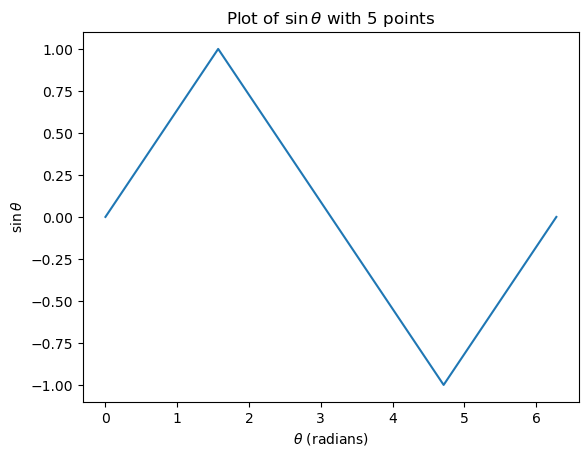

In [5]:
plotter.plot(theta_values_column, sine_values_column)
plotter.xlabel(r'$\theta$ (radians)')
plotter.ylabel(r'$\sin\theta$')
plotter.title(r'Plot of $\sin \theta$ with 5 points')
plotter.show()

## Generating Figure 2 in the above discussion

To generate Figure 2 in the opening discussion for 100 values of $\theta$ is extremely simple. We can simply copy all of the code written so far and paste in a new code cell, as below. But prior to executing the code, we  change the number of points (i.e.`num_points`) to `99`, which we now know will give us the 100 points needed for a smoother curve. Then, running it gives us the necessary plot.

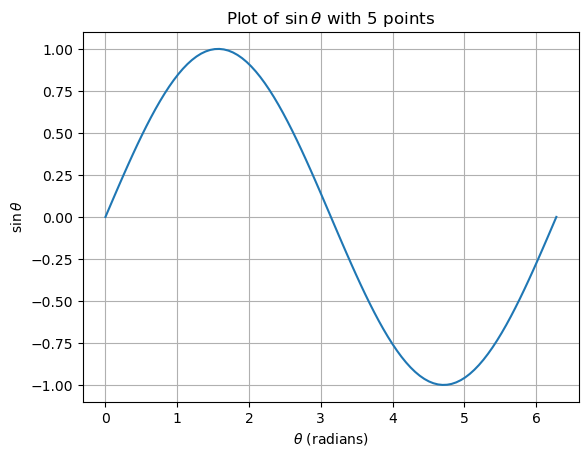

In [6]:
# Generate angles from 0 to 2*pi using a for loop
num_points = 99
theta_values_column = []
for i in range(num_points + 1):
    # print("current value of i", i)
    theta = i / num_points * (2 * pi)
    theta_values_column.append(theta)

# Calculate sin of angles using a for loop again
sine_values_column = []
for theta in theta_values_column:
    sine_values_column.append(sin(theta))

# Plot the sine function again
plotter.plot(theta_values_column, sine_values_column)
plotter.xlabel(r'$\theta$ (radians)')
plotter.ylabel(r'$\sin\theta$')
plotter.title(r'Plot of $\sin \theta$ with 5 points')
plotter.grid(True) # Set to false and see what happens
plotter.show()


## Example 2: Solving the equations of motion f a simple pendulum and plotting the angle
A schematic of a simple pendulum is shown in the figure below, where the $\theta$ is an angle that can be used to study its motion.

![Pendulum](simple_pendulum.png)

You should already be familiar with its second-order equations of motion, given by:
$$
\ddot \theta = -\frac{g}{L}\sin(\theta)
\tag{1}
$$

Now, there are multiple ways to solve the above equation but in this tutorial we teach you how to use a "numerical solver". We do not introduce you to the theory of solving differential equations numerically here- we only teach you how to rewrite the equations in a form that the solver can use to write this equation.

Numerical solvers typically require first-order differential equations- in this case, we need to convert the second-order equation of motion above into something involving only first derivatives. To do so, we define a new variable for $\dot \theta$ 
$$
\dot \theta = \omega
\tag{2}
$$.

Taking the second derivative of the above tell us that $\ddot \theta = \dot \omega$; and then we can subsitute for $\ddot \theta$ from the first equation of motion to get
$$
\dot \omega = -\frac{g}{l}\sin(\theta)
\tag{3}
$$.

Mathematicians and engineers typically refer to $\theta$ and $\omega$ as the states of the system. So, $\dot\theta$ and $\dot\omega$ are rates od change of the state

Thus, we now have two first-order differential equations given by Equations (2) and (3), which are equivalent to the second-order equation given by Equation (1).

### A Python function to store the differential equations
You have been introduced to the concept of writing Python functions in previous modules; we make use of a function called `simple_pendulum_first_order_EoMS` to store the differential equations as shown below.

The differential equations given by Equations (2) and (3) are within the function in the third and fourth lines of code. You can see that I use the variable names `theta` and `omega` for $\theta$ and $\omega$ for easy reading. Similarly, I use variable names `theta_dot` and `omega_dot` for $\dot\theta$ and $\dot\omega$.

Note also that in the second line code in the function `simple_pendulum_first_order_EoMS`, we clearly say that the states are going to be `theta` and `omega`.

In [7]:
def simple_pendulum_first_order_EoMS(t, states, g, l):
    theta, omega = states
    theta_dot = omega
    omega_dot = -g/l*sin(theta)
    return [theta_dot, omega_dot]

Where do you find the length of the pendulum and the acceleration due to gravity- these are stored in variables `l` and `g` as shown below. We also create a [tuple](https://www.w3schools.com/python/python_tuples.asp) called `constants` which we will use in later solving the differential equations with `solve_ivp`.

In [8]:
l = 1.0
g = 9.8
constants = (g, l)

As the differential equations we aim to solve are functions of time, we need to specify the start and end-times that we want to examine- this is stored in . I have chosen start time of  

In [9]:
from math import sqrt
start_time = 0.0
simulation_end_time = 2*pi*sqrt(l/g)
t_span = (start_time, simulation_end_time)

Lastly, we use `solve_ivp` to solve the differential equations within the above created function `simple_pendulum_first_order_EoMS`. `solve_ivp` also requires us to specify the:
- time span of the simulation which we have specified in `t_span`;
- inital values of the angle and angular speed given in `initial_conditions` (this is defined below), and
- `constants`  for `g` and `l`.

I save the numerical solution in a long but explanatory variable name `numerical_solution_to_differential_equations`. 

In [10]:
from scipy.integrate import solve_ivp
initial_conditions = (pi/8, 0.0) # theta_0, omega_0
numerical_solution_to_differential_equations = solve_ivp(simple_pendulum_first_order_EoMS, t_span, initial_conditions, args=constants, rtol = 1e-8, atol = 1e-8)

The solution stores information on various things but the key ones for this tutorial are the time and the solutions for $\theta$ and $\omega$. We show how to access time and theta below, which are stored in variable names `time_values` and `theta_values` as shown below.

In [11]:
time_values = numerical_solution_to_differential_equations.t
theta_values = numerical_solution_to_differential_equations.y[0, :]

With these, plot generation is similar to earlier.

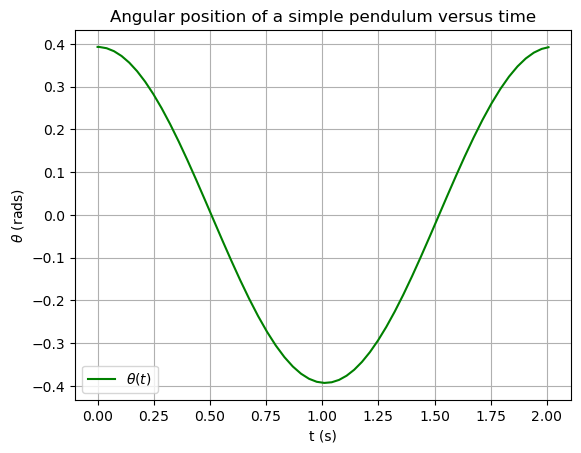

In [12]:

plotter.plot(time_values, theta_values, 'g', label=r'$\theta(t)$')
plotter.legend(loc='best')
plotter.xlabel('t (s)')
plotter.ylabel(r'$\theta$ (rads)')
plotter.title('Angular position of a simple pendulum versus time')
plotter.grid()
plotter.show()

# Exercise
1. Can you create a plot of $\omega$ versus time?
2. Can you generate a plot where we make use of `solution[3, :]` and plot it against time? What happens and why?